In [19]:
import glob
import spectral 
import cv2
import numpy as np
import pandas as pd

In [20]:
msi_path = glob.glob(rf'G:\yanye20250801\*\gaoguangpu\*\*_ref.hdr')

In [21]:
msi = spectral.open_image(msi_path[0]).load()

### 生成tiff光谱图像

确保图像归到0-255之间，如是反射率直接*255（反射率没有高于1的情况下）

In [22]:
import cv2
import spectral
import matplotlib.pyplot as plt
import numpy as np
import glob


def get_tiff(nir_img , save_path) :
    nir_unit8 = nir_img*255
    nir_unit8 = nir_unit8.astype(np.uint8)
    cv2.imwritemulti(f"{save_path}", nir_unit8.transpose(2, 0, 1))

In [23]:
import tqdm
for i in tqdm.tqdm(range(len(msi_path))):

  msi = spectral.open_image(msi_path[i]).load()

  nir_unit8 = msi*255
  nir_unit8 = nir_unit8.astype(np.uint8)

  save_path =  rf'G:\cigarette_tiff_threelabels' +'\\' + msi_path[i].split('\\')[-4] + '_' + msi_path[i].split('\\')[-2] + '.tiff'
  get_tiff(nir_unit8 , save_path)


  0%|          | 0/91 [00:00<?, ?it/s]C:\Users\dell\AppData\Local\Temp\ipykernel_7280\3632269044.py:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  nir_unit8 = msi*255
100%|██████████| 91/91 [02:21<00:00,  1.56s/it]


In [17]:
### 查看tiff图像有没有问题
a = cv2.imreadmulti(save_path)
a = np.array(a[1])
a = a.transpose(1, 2, 0)

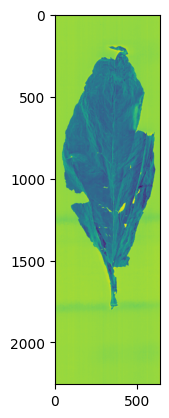

In [18]:
plt.imshow(a[:,:,8])

### 使用yolo生产预标注数据

In [116]:
tiff_paths = glob.glob(r'G:\coffeebean_yolo_0811\images\phenolic\*.tiff')

In [117]:
for tiff_path in tiff_paths :
  output_file = r'G:\coffeebean_yolo_0811\labels\phenolic' + '\\' + tiff_path.split('\\')[-1].split('.')[0]+'.txt'
 

  msi_tiff = cv2.imreadmulti(tiff_path)
  msi_tiff = np.array(msi_tiff[1])
  msi_tiff = msi_tiff.transpose(1, 2, 0)
  hyper_gray = msi_tiff[:,:,8]
  hyper_gray = hyper_gray.astype(np.uint8)
  hyper_cv = cv2.cvtColor(hyper_gray, cv2.COLOR_GRAY2BGR)
  msi_res = yolo.detect_obj(hyper_cv)

  class_name= '0'

  with open(output_file, 'w') as file:
          print(output_file)
          for roi in msi_res :
            x_center = round(roi[0] / hyper_gray.shape[1], 6)
            y_center = round(roi[1] / hyper_gray.shape[0], 6)
            width = round(roi[2] / hyper_gray.shape[1], 6)
            height = round(roi[3] / hyper_gray.shape[0], 6)
            file.write(f"{class_name} {x_center} {y_center} {width} {height}\n")


G:\coffeebean_yolo_0811\labels\phenolic\phenolic11_20250807_145748.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic12_20250807_145810.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic13_20250807_150426.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic14_20250807_150451.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic15_20250807_151056.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic16_20250807_151115.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic17_20250807_163646.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic18_20250807_163709.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic19_20250807_164345.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic20_20250807_164411.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic21_20250807_165821.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic22_20250807_165848.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic23_20250807_170708.txt
G:\coffeebean_yolo_0811\labels\phenolic\phenolic24_20250807_170732.txt
G:\cof

### 替换标注文件文件名

In [1]:
def replace_class_in_file(input_file, output_file, old_class, new_class):
    with open(input_file, 'r') as file:
        lines = file.readlines()

    with open(output_file, 'w') as file:
        for line in lines:
            parts = line.split()
            if len(parts) > 0 and parts[0] == old_class:
                line = f"{new_class} {' '.join(parts[1:])}\n"
            file.write(line)

# # 使用示例
# replace_N_with_1('test/test.txt', 'test/test.txt')

In [11]:
import glob
output_folder = rf'G:\coffee_bean\coffeebean_yolo_0811\labels\val\moldy'

input_files  = glob.glob(rf'G:\coffee_bean\coffeebean_yolo_0811\labels\val\moldy\*.txt')
old_class = '0'
new_class = '2'
for input_file in  input_files:
    output_file = output_folder + '\\' + input_file.split('\\')[-1]
    replace_class_in_file(input_file, output_file , old_class ,new_class )